# Проект: Исследование стартапов

## Введение

### Цели и задачи проекта

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

### Описание данных

Таблица `acquisition` содержит информацию о покупках одними компаниями других компаний

Таблица `company_and_rounds` содержит информацию о компаниях и раундах финансирования

Таблица `education Содержит` информацию об образовании сотрудника

Таблица `people` Содержит информацию о сотрудниках

Таблица `degrees` Содержит информацию о типе образования сотрудника

### Содержимое проекта

- Загрузка данных и знакомство с ними
- Предобработка данных
- Исследовательский анализ данных
- Итоговый вывод и рекомендации

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Загружаем библиотеки и данные. Путь к файлам: `https://code.s3.yandex.net/datasets/` + имя файла.

In [1]:
# устанавливаем необходимую библиотеки в случае её отсутствия
!pip install phik    

     |████████████████████████████████| 677 kB 2.4 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Выгружаем данные в переменные
address = 'https://code.s3.yandex.net/datasets/'

acquisition_df = pd.read_csv(address+'acquisition.csv')
company_and_rounds_df = pd.read_csv(address+'company_and_rounds.csv')
people_df = pd.read_csv(address+'people.csv')
education_df = pd.read_csv(address+'education.csv')
degrees_df = pd.read_csv(address+'degrees.csv')
fund_df = pd.read_csv(address+'fund.csv')
investment_df = pd.read_csv(address+'investment.csv')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
# Выводим информацию о датафрейме
# acquisition_df.info()

In [7]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
# company_and_rounds_df.info()

In [9]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [10]:
# Выводим информацию о датафрейме
# people_df.info()

In [11]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [12]:
# Выводим информацию о датафрейме
# education_df.info()

In [13]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
# Выводим информацию о датафрейме
# degrees_df.info()

* Датафрейм `acquisition_df` содержит 6 столбцов 9407 строк. Названия соответствуют содержанию столбцов. Больше всего пропусков в столбце `term_code`. Возможно пропуски в "вариантах расчёта" связаны с отсутствием информации или много различных способов и  не всегда используется один вариант расчета.
* Датафрейм `company_and_rounds_df` содержит 22 столбца 217774 строк. Больше всего пропусков в столбце `closed_at`. Пропуски в "дата закрытия компании" обусловленны тем , что компании не закрыты, а работают.
* Датафрейм `people_df` содержит 5 столбцов 226709 строк. Названия соответствуют содержанию столбцов. Больше всего пропусков в столбце `company_id`. "идентификатор компании" отсутствует, возможно из за ошибки при заполнении данных.
* Датафрейм `education_df` содержит 4 столбцов 109610 строк. Названия соответствуют содержанию столбцов. Больше всего пропусков в столбце `graduated_at`. "дата получения образования" может отсутствовать, потому что сотрудник не окончил учебное заведение.
* Датафрейм `degrees_df` содержит 4 столбцов 109610 строк. Названия соответствуют содержанию столбцов. Больше всего пропусков в столбце `subject`. "специальность" может быть не указанна в типе образования сотрудника.


In [15]:
# Создаем словарь с датафреймами
dfs = {11: acquisition_df, 22: company_and_rounds_df, 33: people_df, 44:education_df, 55: degrees_df, 66: fund_df, 77: investment_df}

In [16]:
def lookup_datasets(dfs, filenames=None):
    """
    Выводит информацию о датасетах из списка

    Parameters:
        dfs (list of pd.DataFrame): Список датафреймов для обработки.
        filenames (list of str): Список названий файлов (имена для отображения).
    """
    if filenames is None:
        filenames = [f"df_{i + 1}" for i in range(len(dfs))]

    for df, df_name in zip(dfs, filenames):
        print('-'*10,' '*5, df_name, ' '*5, '-'*10)

        # Пропущенные значения
        missing_data = df.isna().mean()
        missing_data_result = missing_data.apply(lambda x: f'{x:.2%}' if x > 0 else "")
        missing_data_name = "Пропущено" if missing_data.sum() > 0 else ""
        missing_data_result.name = missing_data_name

        # Типы данных
        dtypes_result = df.dtypes
        dtypes_result.name = "Тип данных колонки"
        fewest_nans_row = df.iloc[1:-1].isna().sum(axis=1).idxmin()

        values_type = df.loc[fewest_nans_row].map(type).T
        values_type.name = "Тип значения"

        # Объединяем результаты и пример данных
        result = pd.concat([
            dtypes_result, # типы
            values_type, # типы значений
            missing_data_result, # пропущенные значения
            df.iloc[0, :], # первая строка
            df.loc[fewest_nans_row].T, # полная строка
            df.iloc[-1, :] # последняя строка
        ], axis=1)

        display(result)

        # Проверка на полные дубликаты
        duplicates = df.duplicated().mean()
        if duplicates > 0:
            print(f'Полных дубликатов: {duplicates:.2%}')

        print()

# Проводим автоматический осмотр данных
column_counts = lookup_datasets(dfs.values(), dfs.keys())

----------       11       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,9406
id,int64,<class 'numpy.int64'>,,1,7,10529
acquiring_company_id,int64,<class 'numpy.int64'>,,11,59,53
acquired_company_id,int64,<class 'numpy.int64'>,,10,72,92846
term_code,object,<class 'str'>,80.54%,NaN,cash,NaN
price_amount,int64,<class 'numpy.int64'>,,20000000,60000000,42600000
acquired_at,object,<class 'str'>,0.31%,2007-05-30,2007-07-01,2013-12-12



----------       22       ----------


,Тип данных колонки,Тип значения,Пропущено,0,91,217773
company ID,float64,<class 'numpy.float64'>,0.14%,1.0,1006.0,NaN
name,object,<class 'str'>,0.14%,Wetpaint,Youlicit,NaN
category code,object,<class 'str'>,33.93%,web,web,NaN
status,object,<class 'str'>,0.14%,operating,closed,NaN
founded at,object,<class 'str'>,49.51%,2005-10-17,2006-09-01,NaN
closed at,object,<class 'str'>,98.42%,NaN,2010-05-22,NaN
domain,object,<class 'str'>,32.43%,wetpaint-inc.com,youlicit.com,NaN
network username,object,<class 'str'>,56.13%,BachelrWetpaint,youlicit,NaN
country code,object,<class 'str'>,50.13%,USA,USA,NaN
investment rounds,float64,<class 'numpy.float64'>,0.14%,0.0,0.0,NaN



----------       33       ----------


,Тип данных колонки,Тип значения,Пропущено,0,6,226708
id,int64,<class 'numpy.int64'>,,10,100006,178190
first_name,object,<class 'str'>,0.00%,Mark,Courtney,Alex
last_name,object,<class 'str'>,0.00%,Zuckerberg,Homer,Smith
company_id,float64,<class 'numpy.float64'>,84.73%,5.0,81558.0,NaN
network_username,object,<class 'str'>,82.86%,NaN,jobsbostontech,esocialnetlike



----------       44       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,109609
id,int64,<class 'numpy.int64'>,,1,2,109610
person_id,int64,<class 'numpy.int64'>,,6117,6136,268528
instituition,object,<class 'str'>,0.05%,NaN,"Washington University, St. Louis",University of San Diego School of Law
graduated_at,object,<class 'str'>,47.04%,NaN,1990-01-01,NaN



----------       55       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,109609
id,int64,<class 'numpy.int64'>,,1,2,109610
object_id,object,<class 'str'>,,p:6117,p:6136,p:268528
degree_type,object,<class 'str'>,10.23%,MBA,BA,J.D.
subject,object,<class 'str'>,25.83%,NaN,"English, French",NaN



----------       66       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,11651
id,int64,<class 'numpy.int64'>,,13131,1,2553
name,object,<class 'str'>,0.02%,NaN,Greylock Partners,fbFund
founded_at,object,<class 'str'>,60.48%,NaN,1965-01-01,NaN
domain,object,<class 'str'>,36.82%,NaN,greylock.com,developers.socialnet.com::fbfund.php
network_username,object,<class 'str'>,81.56%,NaN,greylockvc,fbFund
country_code,object,<class 'str'>,39.47%,NaN,USA,NaN
investment_rounds,int64,<class 'numpy.int64'>,,0,307,23
invested_companies,int64,<class 'numpy.int64'>,,0,196,21
milestones,int64,<class 'numpy.int64'>,,0,0,2



----------       77       ----------


,Тип данных колонки,Тип значения,,0,1,61402
id,int64,<class 'int'>,,1,2,61403
funding_round_id,int64,<class 'int'>,,1,1,57948
company_id,int64,<class 'int'>,,4,4,211890
fund_id,int64,<class 'int'>,,1,2,2101


### 1.2. Смена типов и анализ пропусков


In [17]:
# переименовываем названия столбца
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID': 'company_id_first'})

In [18]:
# Заминили пробелы в датафрейме
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

In [19]:
company_and_rounds_df.columns

Index(['company_id_first', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [20]:
# приводим данные в соответствующий тип в датафрейме 
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], format='%Y-%m-%d')
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], format='%Y-%m-%d')
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], format='%Y-%m-%d')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], format='%Y-%m-%d')
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], format='%Y-%m-%d')
company_and_rounds_df['is_first_round'] = pd.to_numeric(company_and_rounds_df['is_first_round'], downcast='float')
company_and_rounds_df['is_last_round'] = pd.to_numeric(company_and_rounds_df['is_last_round'], downcast='float')



In [21]:
# Выводим информацию о датафрейме
acquisition_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [22]:
# Выводим информацию о датафрейме
company_and_rounds_df.isna().mean()

company_id_first       0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [23]:
# Выводим информацию о датафрейме
education_df.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [24]:
# Выводим информацию о датафрейме
people_df.isna().mean()

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [25]:
# Выводим информацию о датафрейме
fund_df.isna().mean()

id                    0.000000
name                  0.000172
founded_at            0.604789
domain                0.368177
network_username      0.815568
country_code          0.394696
investment_rounds     0.000000
invested_companies    0.000000
milestones            0.000000
dtype: float64

In [26]:
# Выводим информацию о датафрейме
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

In [27]:
# Выводим информацию о датафрейме
investment_df.isna().mean() 

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

In [28]:
# Определяем количество незаполненных ячеек
# company_and_rounds_df.isna().mean().sort_values()

Провели анализ пропусков, данных много пропусков.  
Преобразовали к типу данных `datetime64` значения столбцов `acquisition_df['acquired_at']`, `education_df['graduated_at']`, `company_and_rounds_df['founded_at']`, `company_and_rounds_df['funded_at']`, `company_and_rounds_df['closed_at']`.
Понизили разрядность для некоторых числовых полей (столбцов is_first_round и is_last_round).
Вывели данные о доле пропусков в датафреймах.
В таблице acquisition_df всего 9407 строк и 80% пропусков в столбце term_code, но в дальнейшем анализе данный столбец не будет играть весомой роли.
Самая большая по количеству строк и столбцов таблица df_comapny_a_roads она содержит 217774 строки и 22 столбца.
В столбцах funding_round_id, company_id, funded_at, funding_round_type, raised_amount, pre_money_valuation, participants, is_first_round, is_last_round - 75% пропусков, category_code - 33%, founded_at - 50%, closed_at - 98%, domain - 32%, network_username - 56%, country_code - 50%.
В таблице people_df всего 226709 строк около 82-84% пропусков в столбцах company_id, network_username.
В таблице education_df всего 109610 строк и 47% пропусков в столбце graduated_at.
В таблице degrees_df всего 109610 строк и пропуски в столбцах degree_type - 10%, subject - 25%.

Так как данных в каждой таблице достаточное количество, то пропуски, которые присутствуют во многих таблицах можно игнорировать, так как данных для анализа все еще достаточно.



## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Проводим анализ на основе датасета `company_and_rounds.csv`.
Выясняем какое количество раундов может быть. 
Добавляем отдельно столбец с данными года. 
Вычисляем для каждого года типичный размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования.
Оставляем в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
 

In [29]:
# выводим уникальные значения столбца раундов финансирования
company_and_rounds_df['funding_rounds'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., nan])

In [30]:
# проверяем дубликаты
company_and_rounds_df.duplicated().sum()

0

In [31]:
# создаем копию для изменений данных 
company_and_rounds_df_new=company_and_rounds_df.copy()

In [32]:
# создаем новый столб с годом
company_and_rounds_df_new['funded_at_year']=company_and_rounds_df_new['funded_at'].dt.to_period('Y')
# company_and_rounds_df_new.info() 


In [33]:
# группируем по году и вычисляем общую сумму выделяемых средств и общее количество раундов
company_and_rounds_group = company_and_rounds_df_new.groupby('funded_at_year').agg({'raised_amount':'median', 'funding_round_id': 'nunique'}).reset_index()


In [34]:
# создаем новый датафрейм в котором выбраны года с более чем 50 раундов финансирования
company_and_rounds = company_and_rounds_group[company_and_rounds_group['funding_round_id']>50]
display(company_and_rounds)

,funded_at_year,raised_amount,funding_round_id
15,1999,2000000.0,76
16,2000,4200000.0,125
17,2001,3000000.0,96
18,2002,4200000.0,116
19,2003,3000000.0,159
20,2004,5000000.0,291
21,2005,5500000.0,1633
22,2006,5000000.0,2436
23,2007,3973320.0,3279
24,2008,3110000.0,3774


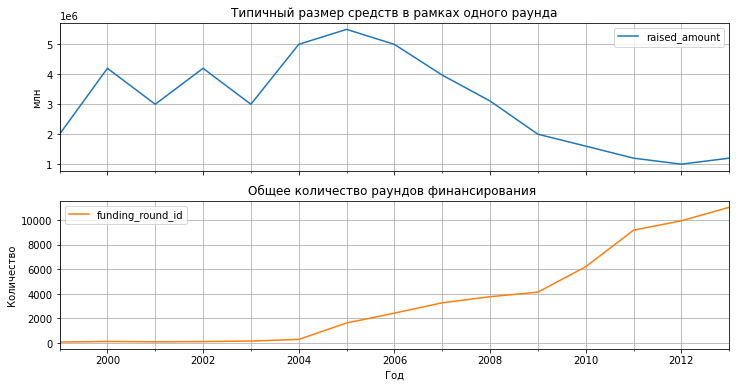

In [35]:
# Строим диаграмму с помощью pandas 
axes = company_and_rounds.plot(kind='line', subplots=True, x='funded_at_year', y=['raised_amount', 'funding_round_id', ], 
               sharex=True,
               sharey=False,
               rot=0, # Градус вращения подписи по оси Х
               legend=True, # Выключаем легенду
               title=['Типичный размер средств в рамках одного раунда', 'Общее количество раундов финансирования '],
               figsize=(12, 6)
)
# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('млн')
axes[1].set_ylabel('Количество')

# Настраиваем оформление графика
plt.xlabel('Год')
# Включаем сетку для каждого из подграфиков
axes[0].grid(which='both')
axes[1].grid(which='both')

# Выводим график
plt.show()



Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году и равнялся 5,5 млн. за один раунд. 
В 2013 году число раундов и размер финансирования выросли по сравнению с прошлым годом 2012 годом.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Для этого объединим датасеты `people.csv` и `education.csv` и разделим все компании на несколько групп по количеству сотрудников.
Мы считаем, что датасете `education.csv` у каждого сотрудника одно образование.

In [36]:
# проверяем количество уникальных работников
len(education_df['person_id'].unique())

68451

In [37]:
# Создаем копию датафрейма
education_df_for = education_df.copy()

# Сортируем датафрейм по всем столбцам
education_df_sorted = education_df_for.sort_values(by=education_df_for.columns.tolist())

# Удаляем дубликаты
education_df_new = education_df_sorted.drop_duplicates(subset=['person_id'])

education_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68451 entries, 0 to 109608
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            68451 non-null  int64         
 1   person_id     68451 non-null  int64         
 2   instituition  68410 non-null  object        
 3   graduated_at  36645 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.6+ MB


In [38]:
# проверяем количество уникальных работников
len(people_df['id'].unique())

226708

In [39]:
# Создаем копию датафрейма
people_df_for = people_df.copy()

# Сортируем датафрейм по всем столбцам
people_df_sorted = people_df_for.sort_values(by=people_df_for.columns.tolist())

# Удаляем дубликаты
people_df_new = people_df_sorted.drop_duplicates(subset=['id'])

people_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 87153 to 156400
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226708 non-null  int64  
 1   first_name        226703 non-null  object 
 2   last_name         226707 non-null  object 
 3   company_id        34614 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [40]:
# объединяем таблицы
people_education = people_df_new.merge(education_df_new, how='left', left_on='id', right_on='person_id')
display(people_education.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 226707
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36390 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 17.3+ MB


None

In [41]:
# удаляем повторяющиеся столбцы
people_education = people_education.drop('id_y', axis=1) 
people_education = people_education.drop('person_id', axis=1) 
# display(people_education.info())

In [42]:
# создаем новый столбец с информацией о наличии образования
people_education['educ_info'] = people_education['instituition'].notna() | people_education['graduated_at'].notna()

In [43]:
# группируем по компаниям, вычисляем общее количество сотрудников и долю образованных
people_education_group = people_education.groupby('company_id').agg({'id_x':'count', 'educ_info':'mean'}).sort_values(by='id_x', ascending = False).reset_index()
# people_education_group.head()

Что бы разделить все компании на несколько групп по количеству сотрудников, вычислим какое их количество встречается.

In [44]:
# people_education_group.value_counts('id_x')

In [45]:
len(people_education_group[people_education_group['id_x']==1])

18116

In [46]:
len(people_education_group[people_education_group['id_x']>1])

4805

In [47]:
len(people_education_group[people_education_group['id_x']==2])

2709

In [48]:
len(people_education_group[people_education_group['id_x']>2])

2096

В текущем датафрейме логичнее разделить компании на три группы:
* один сотрудник
* два сотрудника
* больше двух

In [49]:
print(f'средняя доля образованных в компаниях с одним сотрудником')
print(people_education_group['educ_info'][people_education_group['id_x']==1].mean())

средняя доля образованных в компаниях с одним сотрудником
0.5373702804151027


In [50]:
print(f'средняя доля образованных в компаниях с двумя сотрудниками')
print(people_education_group['educ_info'][people_education_group['id_x']==2].mean())

средняя доля образованных в компаниях с двумя сотрудниками
0.5337763012181617


In [51]:
print(f'средняя доля образованных в компаниях с количеством сотрудников более двух')
print(people_education_group['educ_info'][people_education_group['id_x']>2].mean())

средняя доля образованных в компаниях с количеством сотрудников более двух
0.504996832841466


Провели удаление дубликатов в таблицах, объединили  датасеты `people.csv` и `education.csv`.
Получили таблицу с 226708 строк информацией о сотрудниках и их образовании.

Для разделения компаний на группы, оценили общее количество компаний для разного количества сотрудников. Получается что в основном  в компаниях один сотрудник или два. 
Поэтому решили разделить на группы, где 1 , 2 или более сотрудников.
Получилось, что для компаний с 1 или 2 сотрудниками, доля образованных ~ 53-54 %. Для компаний с количеством более 2 сотрудников   доля образованных снижается до 50 %.

Для более полной оценки можно присоединить к этим таблицам ещё и таблицу `degrees.csv`, но для этого нужно преобразовать 
`object_id`  — идентификатор сотрудника, извлечь числовое значение и преобразовать тип object в int64.


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных. 
Проверим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах.


In [52]:
len(set(company_and_rounds_df['network_username']))

79572

In [53]:
len(set(people_df['network_username']))

38422

In [54]:
len(set(fund_df['network_username']))

2099

In [55]:
len(set(company_and_rounds_df['network_username']).intersection(people_df['network_username']))


2200

Столбец `network_username`, который встречается в нескольких датасетах не подходит для объединения данных. 
Для `company_and_rounds_df` и `people_df` пересечение одинаковых ников составляет около 2 %.
Столбцы с именем `network_username` для объединения данных использовать неполучиться.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [56]:
# Меняем формат отображения для лучшего понимания данных
company_and_rounds_df.describe().style.format('{:.2f}')

,company_id_first,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
count,217472.00,217472.00,217472.00,217472.00,217472.00,52928.00,52928.00,52928.00,52928.00,52928.00,52928.00,52928.00
mean,145287.38,0.04,0.61,5996191.13,0.65,28962.89,98490.89,7946092.26,329452.46,1.53,0.60,0.60
std,91998.16,1.96,1.43,48931604.28,0.83,16821.87,88429.08,42168205.89,65318030.22,2.06,0.49,0.49
min,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,51960.75,0.00,0.00,0.00,0.00,14343.75,26598.00,246330.00,0.00,0.00,0.00,0.00
50%,165262.50,0.00,0.00,0.00,0.00,28885.50,58080.00,1600000.00,0.00,1.00,1.00,1.00
75%,228199.25,0.00,0.00,0.00,1.00,43561.25,171610.75,6700000.00,0.00,2.00,1.00,1.00
max,286215.00,478.00,15.00,5700000000.00,9.00,57952.00,286215.00,3835050000.00,15000000000.00,36.00,1.00,1.00


In [57]:
# Выводим начало датафрейма
company_and_rounds_df.head(10)

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Выводим нижние строки датафрейма
company_and_rounds_df.tail(10)

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
217764,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55358.0,269728.0,2013-08-14,series-a,5600000.0,0.0,7.0,1.0,1.0
217765,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55492.0,78698.0,2013-11-20,series-a,15000000.0,0.0,1.0,1.0,1.0
217766,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56054.0,196289.0,2011-03-01,other,925000.0,0.0,0.0,1.0,1.0
217767,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56158.0,282450.0,2013-11-26,series-a,2600000.0,0.0,0.0,1.0,1.0
217768,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56184.0,146919.0,2013-11-06,other,4900000.0,0.0,0.0,1.0,1.0
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


In [59]:
# Выводим информацию о датафрейме
# company_and_rounds_df.info()

Так как таблица company_and_rounds_df была получена в результате объедеинения двух других таблиц,  возможно нужно сделать разделение ее на эти две таблицы, чтобы в одной была информация о компаниях, а в другой информация о раундах финансирования.

In [60]:
# Таблица компаний
company_df = company_and_rounds_df[[
    'company_id_first', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]].reset_index(drop=True)
company_df = company_df.drop_duplicates(subset=['company_id_first']).reset_index(drop=True)

# company_df.info()

In [61]:
# Таблица раундов
rounds_df = company_and_rounds_df[[
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round',
    'is_last_round'
]].reset_index(drop=True)
rounds_df = rounds_df.drop_duplicates(subset=['company_id']).reset_index(drop=True)

# rounds_df.info()

Так как таблица `company_and_rounds_df` была получена в результате объедеинения двух других таблиц, сложно сделать разделение ее на эти две таблицы, чтобы в одной была информация о компаниях, а в другой информация о раундах финансирования


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [62]:
company_df_invest = company_df.loc[(company_df['funding_rounds']>0) | (company_df['investment_rounds']>0) | (company_df['status']=='acquired')]

In [63]:
company_df_invest.isna().mean().sort_values()

company_id_first     0.000000
name                 0.000000
status               0.000000
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
domain               0.122537
category_code        0.133310
country_code         0.147373
founded_at           0.317569
network_username     0.488306
closed_at            0.947775
dtype: float64

Из датасета `company_df`, полученного в предыдущем задании, выбираем компании интересующие заказчика. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.   
Выбираем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Пропуски присутствуют в значениях 
* "официальный сайт компании" -12 % (у некоторых компанмй может не быть сайта); 
* "категория области деятельности компании" - 13 %
* "код страны компании" - 14 %
* "дата инвестирования" - 31 % (дата основания не влияет на наше исследование)
* "ник компании в сети" - 48 % (раз мы не связываем таблицы по этому ключу, то значения можно игнорировать)
* "дата закрытия компании" - 94 % (не все компании закрылись, некоторые еще работают))




### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [64]:
company_df_invest.describe()

,company_id_first,investment_rounds,funding_rounds,funding_total,milestones
count,40747.000000,40747.000000,40747.000000,4.074700e+04,40747.000000
mean,110555.896140,0.150833,1.291531,1.013561e+07,0.803151
std,90388.070107,3.123291,1.264604,5.646436e+07,1.003431
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,33863.500000,0.000000,1.000000,0.000000e+00,0.000000
50%,69583.000000,0.000000,1.000000,6.000000e+05,1.000000
75%,184744.500000,0.000000,2.000000,5.650650e+06,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000


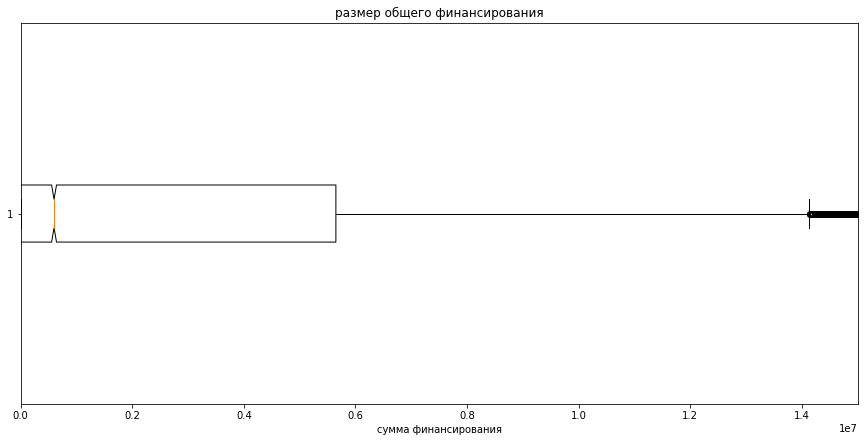

In [65]:
# Создаём контейнер графика matplotlib и задаём его размер
fig = plt.figure(figsize=(15, 7))
 
ax = fig.add_subplot(111)
# Строим диаграмму размаха значений в столбце balance
plt.boxplot(company_df_invest['funding_total'], ax.set_xlim(0, 15000000),  vert=False)

# Добавляем заголовок и метки оси
plt.title('размер общего финансирования')
plt.xlabel('сумма финансирования')

# Выводим график
plt.show()

In [66]:
print(f"Типичное финансирование: {company_df_invest['funding_total'].mean():,.2f}")

Типичное финансирование: 10,135,609.64


Типичный размер общего финансирования находится в диапазоне от 0 до 5,600,000.
Начиная с 5,600,000 размер финансирования будет выбивающимся для многих компаний.
Возможно для точного анализа необходимо исключить выбросы.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [67]:
# Объединим таблицы
company_df_invest_acqu = acquisition_df.merge(company_df_invest, left_on = 'acquired_company_id', right_on = 'company_id_first', how = 'left')


# Выделим таблицу, согласно условию
company_df_invest_zero = company_df_invest_acqu[((company_df_invest_acqu['price_amount'] == 1) | (company_df_invest_acqu['price_amount'] == 0)) & (company_df_invest_acqu['funding_total'] > 0)]
company_df_invest_zero

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
7,14,318,314,cash,0,2006-10-01,314.0,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0
49,65,146,698,cash,0,2007-08-01,698.0,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0
51,67,156,718,cash,0,2007-08-01,718.0,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0
65,87,1035,175,cash,0,2007-10-01,175.0,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0
85,115,396,1582,cash,0,2007-12-01,1582.0,BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,10481,29,165128,NaN,0,2013-12-06,165128.0,EvntLive,music,acquired,NaT,NaT,evntliveinc.com,EVNTLIVE,USA,0.0,1.0,2300000.0,2.0
9382,10500,42365,79582,NaN,0,2013-12-10,79582.0,lucierna,software,acquired,2009-05-22,NaT,lucierna.com,lucierna_inc,ESP,0.0,1.0,2106600.0,0.0
9385,10503,1434,60436,NaN,0,2013-12-10,60436.0,Cloudmeter,enterprise,acquired,2007-04-01,NaT,cloudmeter.com,cloudmeter,USA,0.0,1.0,5000000.0,2.0
9388,10507,29,169154,NaN,0,2013-12-09,169154.0,Quik.io,software,acquired,2011-02-03,NaT,quik.io,quik_io,USA,0.0,2.0,1280000.0,2.0


In [68]:
# Рассчитаем верхнюю и нижнюю границу с помощью iqr
q1 = company_df_invest_zero['funding_total'].quantile(0.25)
q3 = company_df_invest_zero['funding_total'].quantile(0.75)
# Вычислим iqr
iqr = q3 - q1
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr
print(f"Нижняя граница выбросов: {low_bound:,.0f}")
print(f"Верхняя граница выбросов: {up_bound:,.0f}")

Нижняя граница выбросов: -18,250,000
Верхняя граница выбросов: 35,750,000


Так как в данных присутствует большое количество выбросов, а также сильный разброс значений, то границы рассчитанные с помощью iqr не совсем корректны (нижняя граница получилась отрицательной).


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [69]:
# Сгрупируем данные по 'category_code' 
group_cat_df = company_df_invest_acqu.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()
# Отфильтруем категории, в которых больше 5 сделок
group_cat_df = group_cat_df[(group_cat_df['count'] > 5) & (group_cat_df['category_code'] != 'other')]
top_price = group_cat_df[['category_code', 'median']].sort_values(ascending = False, by = 'median').head(5)
top_std = group_cat_df[['category_code', 'std']].sort_values(ascending = False, by = 'std').head(5)

In [70]:
# вычисляем данные из 'category_code'
top_price_t = set(top_price['category_code'])
top_std_t = set(top_std['category_code'])
in_set = top_price_t & top_std_t


In [71]:
print("Категории с высокой средней ценой (ТОП-5):")
display(top_price)

print("Категории с высоким разбросом цен (ТОП-5):")
display(top_std)


Категории с высокой средней ценой (ТОП-5):


,category_code,median
18,manufacturing,72000000
30,real_estate,50000000
3,biotech,13200000
15,hospitality,12500000
11,finance,600000


Категории с высоким разбросом цен (ТОП-5):


,category_code,std
9,enterprise,1.280882e+11
29,public_relations,4.059244e+09
30,real_estate,2.505123e+09
3,biotech,1.540374e+09
14,health,1.249084e+09


Было выбрано топ-5 категорий, так как данное количество является оптимальным, медиана показывет в каких категориях самая высокая цена на стартапы, а стандартное отклонение показывает разброс цен.
Были исключены категории с менее чем 5 сделками, так как расчитанные `median` и `std` могли быть некорректны и исказить анализ.



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [72]:
company_df_invest['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [73]:
group_stat_df = company_df_invest.groupby('status')['funding_rounds'].mean().reset_index()


<Figure size 864x432 with 0 Axes>

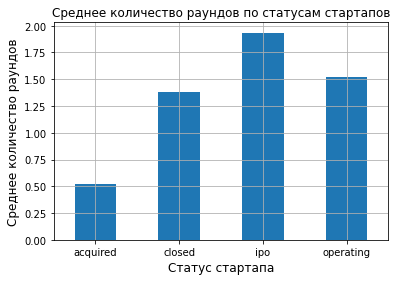

In [74]:
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
group_stat_df.plot(kind='bar', 
                   x='status', 
                   y='funding_rounds', 
                   rot=0, 
                   legend=False, 
                   title=f'Среднее количество раундов по статусам стартапов')

# Настраиваем оформление графика
plt.xlabel('Статус стартапа', fontsize=12)
plt.ylabel('Среднее количество раундов', fontsize=12)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()


IPO-компании проходят больше всего раундов (1.93), а приобретенные — меньше всех (0.52).
Это может говорить о том, что успешные стартапы проходят больше раундов перед выходом на IPO, 
а приобретенные компании продаются на ранних стадиях.


## Шаг 4. Итоговый вывод и рекомендации


В ходе анализа данных для финансовой компании, планирующей инвестировать в стартапы, были получены важные выводы для принятия инвестиционных решений.

#### Основные выводы:
1. Анализ раундов финансирования
  * Максимальные размеры средств в одном раунде наблюдались в 2005 году.
  * В 2013 году наблюдается рост числа раундов и размеров финансирования, что указывает на больший интерес инвесторов.
  * Общее количество раундов финансирования увеличивалось с годами, что подтверждает тенденцию роста рынка.
2. Информация о сотрудниках
  * Образование сотрудников недостаточно полно, особенно в крупных компаниях.
3. Объединение данных
  * Анализ показал, что столбец network_username не подходит для объединения данных.
4. Анализ выбросов
  * Были выявлены выбросы в размерах общего финансирования, из-за большого количества выбросов метод IQR выдал отрицательные значения.
  * Типичные суммы финансирования варьируются от 0 до 5,6 миллионов.
5. Цены стартапов по категориям
  * Самыми привлекательными для инвесторов являются стартапы с высокими ценами и значительным разбросом цен: biotech и real_estate.
6. Количество раундов для разных статусов стартапов:
  * Стартапы, прошедшие IPO, в среднем проходят больше раундов (1.93), в отличие от приобретенных стартапов (0.52).